In [7]:
#Data Collection
import pandas as pd
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Furniture project\ecommerce_furniture_dataset_2024.csv')
print(df.head())

                                        productTitle originalPrice    price  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   $46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN  $169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...         $78.4   $39.46   
3  Modern Accent Boucle Chair,Upholstered Tufted ...           NaN  $111.99   
4  Small Unit Simple Computer Desk Household Wood...        $48.82   $21.37   

   sold        tagText  
0   600  Free shipping  
1     0  Free shipping  
2     7  Free shipping  
3     0  Free shipping  
4     1  Free shipping  


In [9]:
#Data Preprocessing
print(df.isnull().sum())
df = df.dropna()
df['tagText'] = df['tagText'].astype('category').cat.codes
print(df.info())

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 2 to 1983
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   487 non-null    object
 1   originalPrice  487 non-null    object
 2   price          487 non-null    object
 3   sold           487 non-null    int64 
 4   tagText        487 non-null    int8  
dtypes: int64(1), int8(1), object(3)
memory usage: 19.5+ KB
None


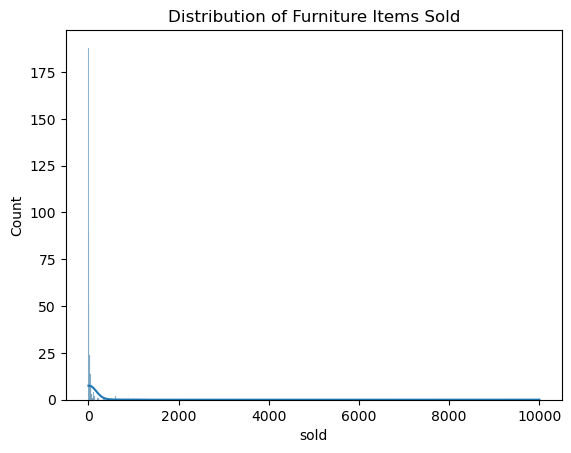

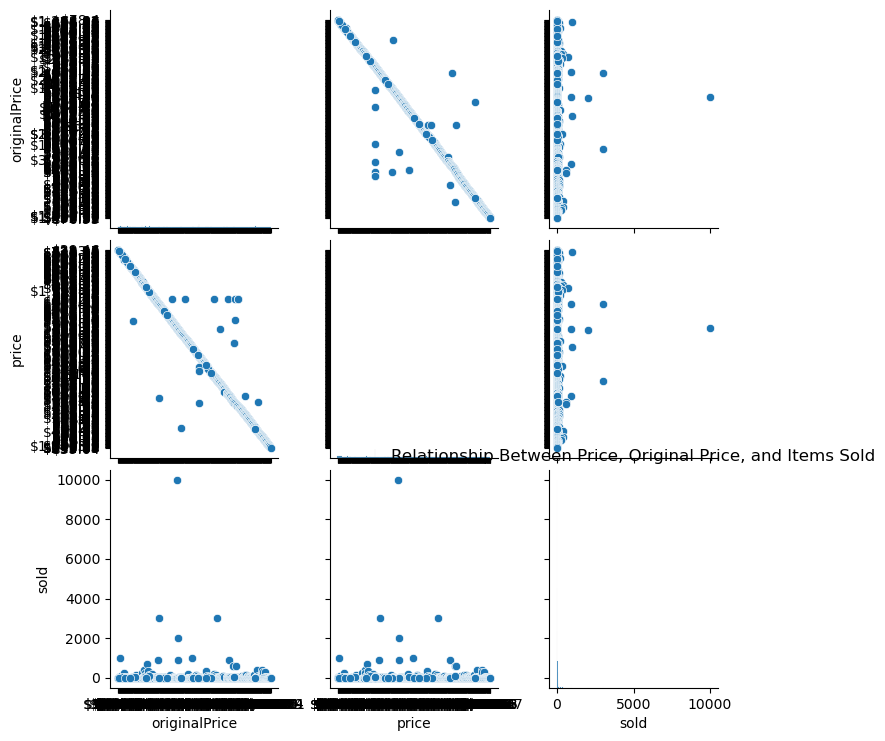

In [13]:
#Exploratory Data Analysis(EDA)
import seaborn as sns
import matplotlib.pyplot as plt
#Distribution of 'sold' values
sns.histplot(df['sold'], kde=True)
plt.title('Distribution of Furniture Items Sold')
plt.show()
sns.pairplot(df, vars=['originalPrice', 'price', 'sold'],
kind='scatter')
plt.title('Relationship Between Price, Original Price, and Items Sold')
plt.show()

In [14]:
#Feature Engineering
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Load the dataset
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Furniture project\ecommerce_furniture_dataset_2024.csv')

# Step 2: Convert the 'productTitle' column to string (in case of NaNs or other types)
df['productTitle'] = df['productTitle'].astype(str)

# Step 3: Create a TF-IDF Vectorizer object
vectorizer = TfidfVectorizer(stop_words='english')  # You can also adjust min_df, max_df if needed

# Step 4: Fit and transform the 'productTitle' column
productTitle_tfidf = vectorizer.fit_transform(df['productTitle'])

# Step 5: Convert TF-IDF matrix to DataFrame
productTitle_tfidf_df = pd.DataFrame(productTitle_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Optional: Add original index if needed
productTitle_tfidf_df.index = df.index

# Step 6: Display the result
print(productTitle_tfidf_df.head())


    00   06   10  100  100w  104  105  105cmx45cmx170cm  105x45x170cm  106  \
0  0.0  0.0  0.0  0.0   0.0  0.0  0.0               0.0           0.0  0.0   
1  0.0  0.0  0.0  0.0   0.0  0.0  0.0               0.0           0.0  0.0   
2  0.0  0.0  0.0  0.0   0.0  0.0  0.0               0.0           0.0  0.0   
3  0.0  0.0  0.0  0.0   0.0  0.0  0.0               0.0           0.0  0.0   
4  0.0  0.0  0.0  0.0   0.0  0.0  0.0               0.0           0.0  0.0   

   ...  yitahome  zeke  zero  zipper  استرخاء  كرسي  신발장   의자  조립식옷장   협탁  
0  ...       0.0   0.0   0.0     0.0      0.0   0.0  0.0  0.0    0.0  0.0  
1  ...       0.0   0.0   0.0     0.0      0.0   0.0  0.0  0.0    0.0  0.0  
2  ...       0.0   0.0   0.0     0.0      0.0   0.0  0.0  0.0    0.0  0.0  
3  ...       0.0   0.0   0.0     0.0      0.0   0.0  0.0  0.0    0.0  0.0  
4  ...       0.0   0.0   0.0     0.0      0.0   0.0  0.0  0.0    0.0  0.0  

[5 rows x 2190 columns]


In [22]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load the dataset
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Furniture project\ecommerce_furniture_dataset_2024.csv')

# 3. Data cleaning

# Remove currency symbols and commas from price columns (if present)
df['originalPrice'] = df['originalPrice'].replace('[₹$,]', '', regex=True).replace(',', '', regex=True)
df['price'] = df['price'].replace('[₹$,]', '', regex=True).replace(',', '', regex=True)

# Convert to numeric
df['originalPrice'] = pd.to_numeric(df['originalPrice'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with missing or invalid price values
df.dropna(subset=['originalPrice', 'price'], inplace=True)

# Drop any remaining duplicates or nulls
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# 4. Feature engineering

# Calculate discount percentage
df['discount_percentage'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100

# Encode categorical feature: category (if exists)
if 'category' in df.columns:
    le = LabelEncoder()
    df['category_encoded'] = le.fit_transform(df['category'])
else:
    df['category_encoded'] = 0  # Dummy column if category not found

# 5. Define features (X) and target (y)
feature_cols = ['rating', 'discount_percentage', 'category_encoded']  # Add more if available
target_col = 'price'

# Check if all features exist in dataframe
feature_cols = [col for col in feature_cols if col in df.columns]

X = df[feature_cols]
y = df[target_col]

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 9. Print evaluation results
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)


Mean Squared Error (MSE): 34597.61741329869
R2 Score: -0.307747018602065


In [28]:
# 1. Import the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Create the model
lr = LinearRegression()

# 3. Train the model
lr.fit(X_train, y_train)

# 4. Predict
y_pred_lr = lr.predict(X_test)

# 5. Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Evaluation:")
print("MSE:", round(mse_lr, 2))
print("R² Score:", round(r2_lr, 4))


Linear Regression Evaluation:
MSE: 26643.34
R² Score: -0.0071


In [30]:
# Assuming you already have y_pred from RandomForestRegressor
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print("\n Random Forest Evaluation:")
print("MSE:", round(mse_rf, 2))
print("R² Score:", round(r2_rf, 4))



 Random Forest Evaluation:
MSE: 34597.62
R² Score: -0.3077


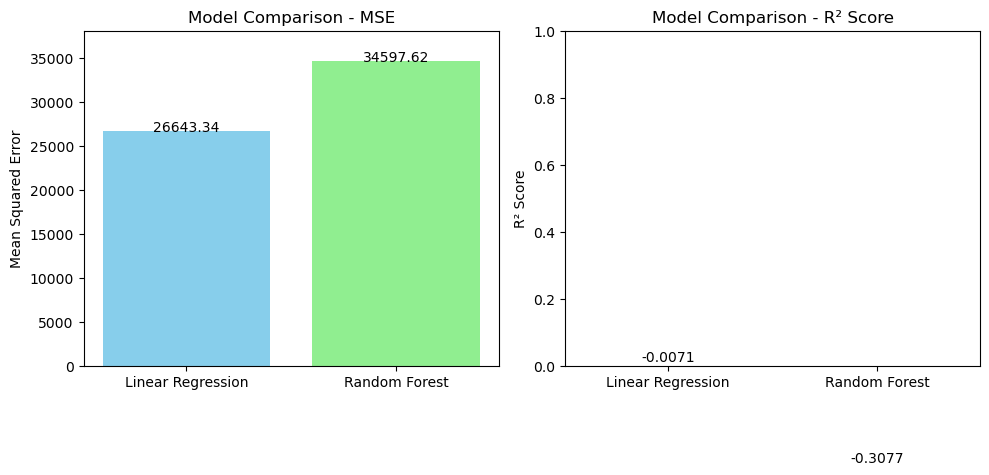

In [34]:
#Model Comparison Chart
import matplotlib.pyplot as plt
import numpy as np

# --- Step 1: Store metrics for each model ---

models = ['Linear Regression', 'Random Forest']
mse_scores = [mse_lr, mse_rf]
r2_scores = [r2_lr, r2_rf]

# --- Step 2: Plot MSE Comparison ---
plt.figure(figsize=(10, 5))

# Plot MSE
plt.subplot(1, 2, 1)
bars1 = plt.bar(models, mse_scores, color=['skyblue', 'lightgreen'])
plt.title('Model Comparison - MSE')
plt.ylabel('Mean Squared Error')
plt.ylim(0, max(mse_scores) * 1.1)
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center')

# Plot R² Score
plt.subplot(1, 2, 2)
bars2 = plt.bar(models, r2_scores, color=['skyblue', 'lightgreen'])
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1)
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 4), ha='center')

plt.tight_layout()
plt.show()


In [36]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 162.5 kB/s eta 0:15:23
   ---------------------------------------- 0.0/150.0 MB 217.9 kB/s eta 0:11:29
   ---------------------------------------- 0.1/150.0 MB 272.3 kB/s eta 0:09:11
   ---------------------------------------- 0.1/150.0 MB 479.3 kB/s eta 0:05:13
   ---------------------------------------- 0.2/150.0 MB 689.9 kB/s eta 0:03:38
   ---------------------------------------- 0.4/150.0 MB 1.2 MB/s eta 0:02:07
   ---------------------------------------- 0.6/150.0 MB 1.6 MB/s eta 0:01:35
   ---------------------------------------- 0.8/150.0 MB 2.0 MB/s eta 0:01:15
   ---------------------------------------- 1.0/150.0 MB 2.1 MB/s eta 0:01:10
   ---------------------------------------- 1.2/150.0 MB 2.4 MB/s eta 0:01:

In [38]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Evaluation:")
print("MSE:", round(mse_xgb, 2))
print("R² Score:", round(r2_xgb, 4))


XGBoost Evaluation:
MSE: 32979.74
R² Score: -0.2466


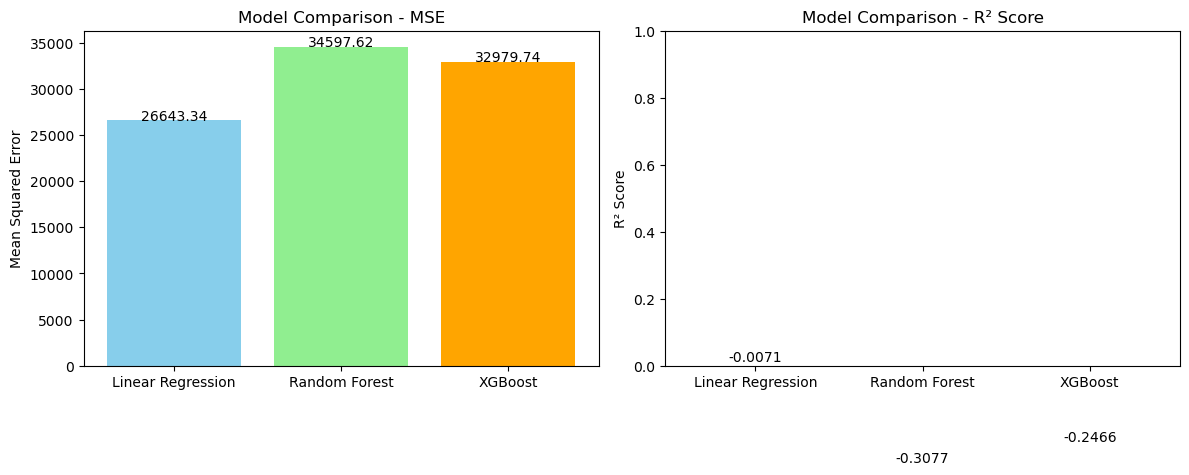

In [39]:
import matplotlib.pyplot as plt

# Update model names and scores
models = ['Linear Regression', 'Random Forest', 'XGBoost']
mse_scores = [mse_lr, mse_rf, mse_xgb]
r2_scores = [r2_lr, r2_rf, r2_xgb]

# Plot the comparison
plt.figure(figsize=(12, 5))

# MSE Chart
plt.subplot(1, 2, 1)
bars1 = plt.bar(models, mse_scores, color=['skyblue', 'lightgreen', 'orange'])
plt.title('Model Comparison - MSE')
plt.ylabel('Mean Squared Error')
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center')

# R² Chart
plt.subplot(1, 2, 2)
bars2 = plt.bar(models, r2_scores, color=['skyblue', 'lightgreen', 'orange'])
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1)
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 4), ha='center')

plt.tight_layout()
plt.show()


In [49]:
# Step 1: Get feature importances from your RandomForestRegressor model
rf_feature_importance = pd.Series(model.feature_importances_, index=X.columns)
rf_feature_importance = rf_feature_importance.sort_values(ascending=False)


In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare DataFrame from feature importances
importance_df = pd.DataFrame({
    'Feature': rf_feature_importance.index,
    'Importance': rf_feature_importance.values,
    'Group': 'All'  # dummy column for hue
})

# Plot using dummy hue to support palette
plt.figure(figsize=(8, 5))
sns.barplot(
    data=importance_df,
    x='Importance',
    y='Feature',
    hue='Group',            # fix for future seaborn
    palette='crest',
    legend=False            # don't show legend
)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("rf_feature_importance.png")
plt.close()


In [95]:
# Convert to DataFrame with dummy 'hue' column
importance_df = pd.DataFrame({
    'Feature': rf_feature_importance.index,
    'Importance': rf_feature_importance.values,
    'Group': 'All'  # single group for hue
})

# Warning-free barplot with palette and hue
plt.figure(figsize=(8, 5))
sns.barplot(
    data=importance_df,
    x='Importance',
    y='Feature',
    hue='Group',
    palette="crest",
    legend=False  # prevent legend from showing "All"
)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("rf_feature_importance.png")
plt.close()


In [61]:
pip install python-pptx


Note: you may need to restart the kernel to use updated packages.


In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches
from sklearn.metrics import mean_squared_error, r2_score

# Create PowerPoint presentation
prs = Presentation()

# Slide 1: Title
slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(slide_layout)
slide.shapes.title.text = "E-commerce Furniture ML Analysis"
slide.placeholders[1].text = "Model Evaluation & Feature Insights"

# Slide 2: Model Evaluation Summary
slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(slide_layout)
slide.shapes.title.text = "Model Evaluation Summary"

content = slide.placeholders[1]
content.text = (
    "Linear Regression\n"
    f"   - MSE: {mse_lr:.2f}, R²: {r2_lr:.4f}\n"
    "Random Forest Regressor\n"
    f"   - MSE: {mse_rf:.2f}, R²: {r2_rf:.4f}\n"
    "XGBoost Regressor\n"
    f"   - MSE: {mse_xgb:.2f}, R²: {r2_xgb:.4f}"
)

# Slide 3: Random Forest Feature Importance (NO palette)
rf_feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=rf_feature_importance.values, y=rf_feature_importance.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("rf_feature_importance.png")
plt.close()

slide = prs.slides.add_slide(prs.slide_layouts[5])
slide.shapes.title.text = "Random Forest Feature Importance"
slide.shapes.add_picture("rf_feature_importance.png", Inches(1), Inches(1.5), height=Inches(4.5))

# Slide 4: Model Comparison Charts (NO palette)
models = ['Linear Regression', 'Random Forest', 'XGBoost']
mse_scores = [mse_lr, mse_rf, mse_xgb]
r2_scores = [r2_lr, r2_rf, r2_xgb]

plt.figure(figsize=(12, 5))

# MSE
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=mse_scores)
plt.title("MSE Comparison")
plt.ylabel("Mean Squared Error")

# R²
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=r2_scores)
plt.title("R² Score Comparison")
plt.ylabel("R² Score")
plt.ylim(0, 1)

plt.tight_layout()
plt.savefig("model_comparison.png")
plt.close()

slide = prs.slides.add_slide(prs.slide_layouts[5])
slide.shapes.title.text = "Model Comparison: MSE & R² Score"
slide.shapes.add_picture("model_comparison.png", Inches(1), Inches(1.5), height=Inches(4.5))

# Save PPTX
pptx_filename = "Ecommerce_Furniture_Analysis.pptx"
prs.save(pptx_filename)

print(f"PowerPoint created and saved as: {pptx_filename}")


PowerPoint created and saved as: Ecommerce_Furniture_Analysis.pptx


<Axes: xlabel='Importance', ylabel='Feature'>

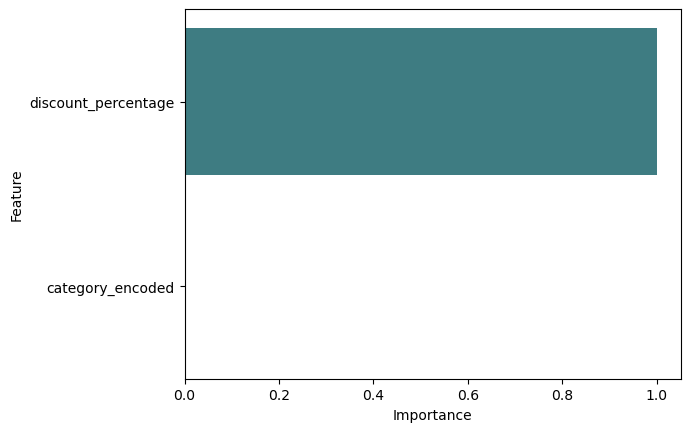

In [81]:
# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': rf_feature_importance.index,
    'Importance': rf_feature_importance.values,
    'DummyGroup': 'All'  # Single group
})

# Now plot using 'hue'
sns.barplot(
    data=importance_df,
    x='Importance',
    y='Feature',
    hue='DummyGroup',
    palette='crest',
    legend=False
)


<Axes: >

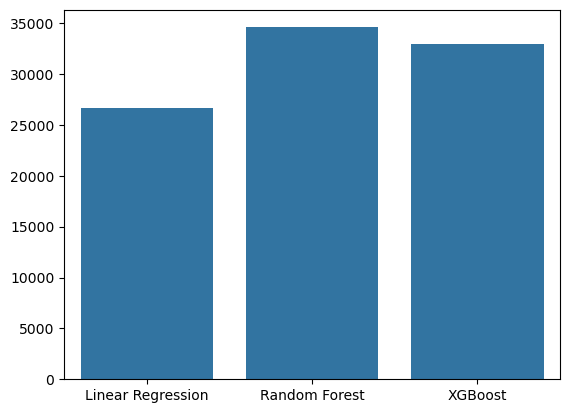

In [77]:
sns.barplot(x=models, y=mse_scores)
sns.barplot(x=models, y=r2_scores)


<Axes: ylabel='None'>

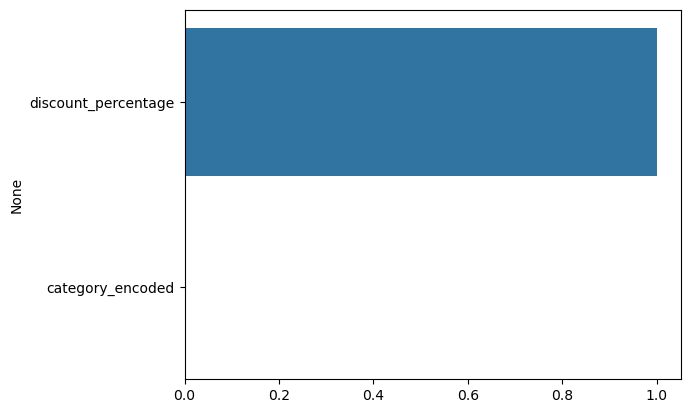

In [73]:
sns.barplot(x=rf_feature_importance.values, y=rf_feature_importance.index)
